데이터셋 불러오기

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler
Data load

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error

# Data load #

In [21]:
data=pd.read_csv('./train.csv', index_col=0)
print(data.shape)

(45532, 77)


# 기본 정보와 QdE, QdA만 남기고 변수 제거 #

In [22]:
drop_val = ['QaA', 'QbA', 'QbE', 'QcA', 'QcE', 'QdE', 'QeA','QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE','tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

data = data.drop(drop_val, axis = 1)
data.head()

,QaE,QdA,age_group,education,engnat,familysize,gender,hand,married,race,religion,voted
index,,,,,,,,,,,,
0,363,1.0,30s,2,1,4,Female,1,3,White,Other,2
1,647,5.0,20s,4,2,3,Female,1,1,Asian,Hindu,2
2,1623,4.0,30s,3,1,3,Male,1,2,White,Other,1
3,504,3.0,20s,4,2,0,Female,1,1,Asian,Hindu,1
4,927,2.0,20s,3,1,2,Male,1,2,White,Agnostic,1


# 결측값 처리 #

In [23]:
#missing 확인
print('data : ',data.isnull().sum())

data :  QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
voted         0
dtype: int64


 # 전처리 및 불필요한 피쳐 제거 #

In [24]:
#labelencoding
label = LabelEncoder()
data['gender_code'] = label.fit_transform(data['gender'])
data['age_group_code'] = label.fit_transform(data['age_group'])
data['race_code'] = label.fit_transform(data['race'])
data['religion_code'] = label.fit_transform(data['religion'])

drop2 = ['gender','age_group','race','religion']
data = data.drop(drop2, axis = 1)

# target 변수의 분포 파악 (시각화) #

<BarContainer object of 2 artists>

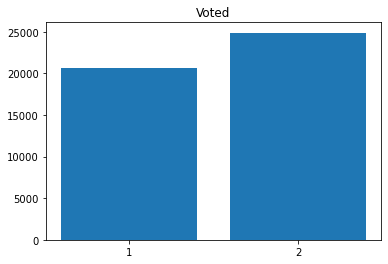

In [25]:
train_y = data['voted']

tar = [str(train_y.unique()[1]), str(train_y.unique()[0])]
count= [train_y.value_counts()[1], train_y.value_counts()[2]]
plt.title('Voted')
plt.bar(tar, count)

<AxesSubplot:xlabel='gender_code', ylabel='count'>

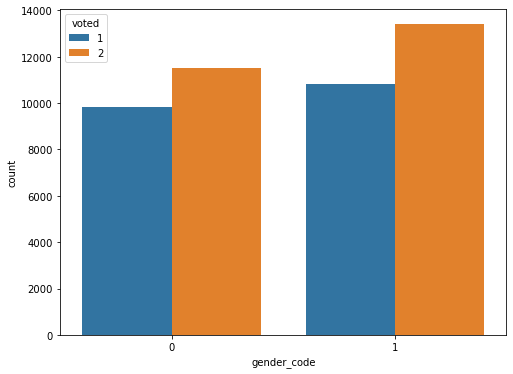

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(data = data, x = 'gender_code', hue = train_y)

## 굉장이 다른 성향을 보이는 age group이 존재 ##

<AxesSubplot:xlabel='age_group_code', ylabel='count'>

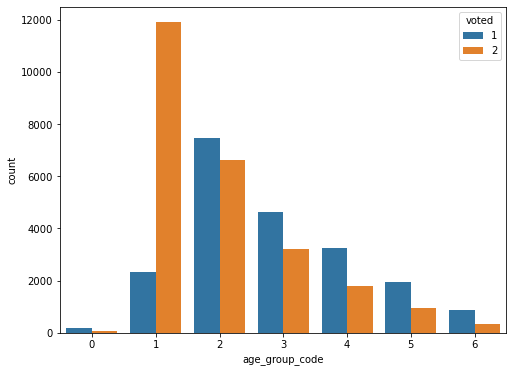

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(data = data, x = 'age_group_code', hue = train_y)

## Heat-map 분석을 통한 변수 간의 연관성 확인 ##

<AxesSubplot:>

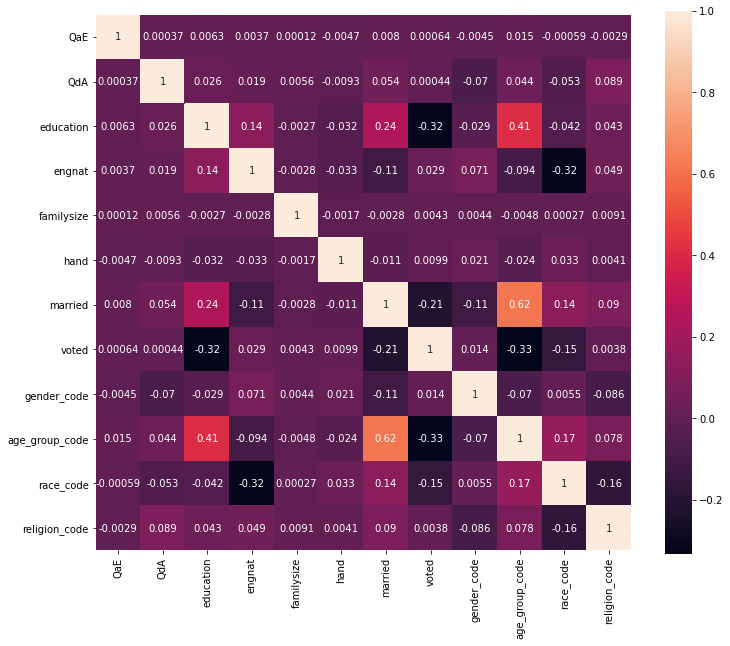

In [28]:
#heatmap
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(),square = True, annot = True)

## 머신러닝 모델 설계 ## 

In [29]:
# 변수 제거
drop_last = ['familysize', 'gender_code','hand','education']
new_data= data.drop(drop_last, axis = 1)
new_data = new_data.drop(['voted'], axis = 1)


In [38]:
new_data.shape

(45532, 7)

In [31]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   QaE             45532 non-null  int64  
 1   QdA             45532 non-null  float64
 2   engnat          45532 non-null  int64  
 3   married         45532 non-null  int64  
 4   age_group_code  45532 non-null  int64  
 5   race_code       45532 non-null  int64  
 6   religion_code   45532 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 3.8 MB


In [33]:
train = new_data [0:38000]
test = new_data [38000:]

train_y1 = train_y [0:38000]
test_y1 = train_y [38000:]

In [36]:
from sklearn import svm

In [39]:
model = svm.SVC()
model.fit(train, train_y1)

SVC()

In [40]:
pred_y = model.predict (test)

In [42]:
print("prediction accuracy: {:.2f}".format(np.mean(pred_y == test_y1))) # 예측 정확도

prediction accuracy: 0.54
